# Test om koden er riktig implementert

Her er et forslag til testfunksjoner for å sjekke om koden er riktig implementert.
```assert variabel``` vil gi en feilmelding med mindre variabelen ```variabel = True```. For eksempel vil ```assert a == b``` gi en feilmelding med mindre ```a``` og ```b``` er like.

In [1]:
#For eksempel:
variable = True
assert variable, "You need to change 'variable' to True"

In [2]:
from layers import *
from neural_network import NeuralNetwork
from utils import onehot
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#We choose some arbitrary values for the dimensions
b = 6
n_max = 7
m = 8
n = 5

d = 10
k = 5
p = 20

#Create an arbitrary dataset
x = np.random.randint(0, m, (b,n))
y = np.random.randint(0, m, (b,n_max))

#initialize the layers
feed_forward = FeedForward(d,p)
attention = Attention(d,k)
embed_pos = EmbedPosition(n_max,m,d)
un_embed = LinearLayer(d,m)
softmax = Softmax()


#a manual forward pass
X = onehot(x, m)

z0 = embed_pos.forward(X)
z1 = feed_forward.forward(z0)
z2 = attention.forward(z1)
z3 = un_embed.forward(z2)
Z = softmax.forward(z3) 


#check the shapes
assert X.shape == (b,m,n), f"X.shape={X.shape}, expected {(b,m,n)}"
assert z0.shape == (b,d,n), f"z0.shape={z0.shape}, expected {(b,d,n)}"
assert z1.shape == (b,d,n), f"z1.shape={z1.shape}, expected {(b,d,n)}"
assert z2.shape == (b,d,n), f"z2.shape={z2.shape}, expected {(b,d,n)}"
assert z3.shape == (b,m,n), f"z3.shape={z3.shape}, expected {(b,m,n)}"
assert Z.shape == (b,m,n), f"Z.shape={Z.shape}, expected {(b,m,n)}"

#is X one-hot?
assert X.sum() == b*n, f"X.sum()={X.sum()}, expected {b*n}"


assert np.allclose(Z.sum(axis=1), 1), f"Z.sum(axis=1)={Z.sum(axis=1)}, expected {np.ones(b)}"
assert np.abs(Z.sum() - b*n) < 1e-5, f"Z.sum()={Z.sum()}, expected {b*n}"
assert np.all(Z>=0), f"Z={Z}, expected all entries to be non-negative"



In [4]:

#test the forward pass
x = np.random.randint(0, m, (b,n_max))
X = onehot(x, m)

#we test with a y that is shorter than the maximum length
n_y = n_max - 1
y = np.random.randint(0, m, (b,n_y))

#initialize a neural network based on the layers above
network = NeuralNetwork([embed_pos, feed_forward, attention, un_embed, softmax])
#and a loss function
loss = CrossEntropy()

#do a forward pass
Z = network.forward(X)

#compute the loss
L = loss.forward(Z, y)

#get the derivative of the loss wrt Z
grad_Z = loss.backward()
#and perform a backward pass
_ = network.backward(grad_Z)

#and and do a gradient descent step
_ = network.step_gd(0.01)

In [5]:
"""
Here you may add additional tests to for example:
- Check if the ['d'] keys in the parameter dictionaries are not None, or receive something when running backward pass
- Check if the parameters change when you perform a gradient descent step
- Check if the loss decreases when you perform a gradient descent step

This is voluntary, but could be useful.
"""

"\nHere you may add additional tests to for example:\n- Check if the ['d'] keys in the parameter dictionaries are not None, or receive something when running backward pass\n- Check if the parameters change when you perform a gradient descent step\n- Check if the loss decreases when you perform a gradient descent step\n\nThis is voluntary, but could be useful.\n"

In [6]:
#check if loss is non-negative
assert L >= 0, f"L={L}, expected L>=0"
assert grad_Z.shape == Z.shape, f"grad_Z.shape={grad_Z.shape}, expected {Z.shape}"

#check if onehot(y) gives zero loss
Y = onehot(y, m)
L = loss.forward(Y, y)
assert L < 1e-5, f"L={L}, expected L<1e-5"


In [23]:
# feed_forward1 = FeedForward(d,p)
# attention1 = Attention(d,k)
# embed_pos = EmbedPosition(n_max,m,d)
# un_embed_pos = LinearLayer(d,m)
# softmax = Softmax()
# layers = [embed_pos,attention1,feed_forward1,un_embed_pos, softmax]
# nueralnet = NeuralNetwork(layers)

b = 6
n_max = 7
m = 8
n = 5

d = 10
k = 5
p = 20

x = np.random.randint(0, m, (b,n_max))
y = np.random.randint(0, m, (b,n_max-1))

def algorithm_4(x, y, m , d, p, k, n_max):
    n_iter = 100
    loss = CrossEntropy()
    L_arr = np.zeros(n_iter)
    feed_forward1 = FeedForward(d,p)
    attention1 = Attention(d,k)
    embed_pos = EmbedPosition(n_max,m,d)
    un_embed_pos = LinearLayer(d,m)
    softmax = Softmax()
    layers = [embed_pos, attention1,feed_forward1, un_embed_pos, softmax]
    nueralnet = NeuralNetwork(layers)

    alpha = 0
    Losses = []
    for j in range(1,n_iter):
       
        X = onehot(x, m)
        Z = nueralnet.forward(X) 
        Losses.append(loss.forward(Z,y))
        dLdz = loss.backward()
        nueralnet.backward(dLdz) 
        layers[0].step_gd(alpha)
        layers[2].step_gd(alpha)
        layers[1].step_adam(j)
        layers[3].step_adam(j)
        print(f'loss for iteration {j}: {loss.forward(Z,y)}') 
    return Losses   

arr = algorithm_4(x, y, m , d, p, k, n_max)



loss for iteration 1: 1.49602461478411
loss for iteration 2: 1.4959804106678842
loss for iteration 3: 1.4959943051156532
loss for iteration 4: 1.4959926310432503
loss for iteration 5: 1.4959859638759994
loss for iteration 6: 1.4959745755683431
loss for iteration 7: 1.4959549518771798
loss for iteration 8: 1.4959218543556734
loss for iteration 9: 1.4958733572061906
loss for iteration 10: 1.495807587624913
loss for iteration 11: 1.4957243120366512
loss for iteration 12: 1.4956238913452427
loss for iteration 13: 1.4955093970911069
loss for iteration 14: 1.4953829317124538
loss for iteration 15: 1.4952457257536436
loss for iteration 16: 1.49509946885455
loss for iteration 17: 1.4949441694966739
loss for iteration 18: 1.494781650460209
loss for iteration 19: 1.4946131893658865
loss for iteration 20: 1.4944423837881244
loss for iteration 21: 1.4942715577820527
loss for iteration 22: 1.4941129369725834
loss for iteration 23: 1.493993439095418
loss for iteration 24: 1.4939166045012326
loss for

[1.4903125120298253, 1.4895724103598786, 1.4886347448276993, 1.4877067633078107, 1.4867939221108, 1.4857743347338939, 1.4842328671495113, 1.4806658543280755, 1.5274978554386012, 1.5376606315221424, 2.403209399813494, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf]


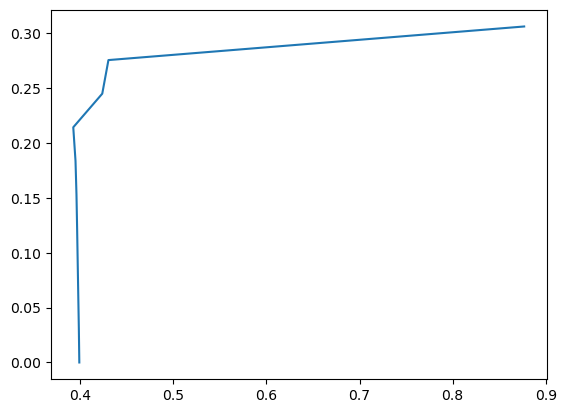

In [22]:
print(arr)
plt.plot(np.log(arr), np.linspace(0,3,99))
plt.show()